# **Naive Bayes Classifier in Python** <a class="anchor" id="0"></a>

El clasificador Naïve Bayes es un algoritmo sencillo y potente para la tarea de clasificación. 

Usaremos las herramietas de Scikit-Learn para implementar el algoritmo de clasificación Naive Bayes.

**Objetivo**: Construir un clasificador Naive Bayes para predecir si una persona gana más de 50K USD al año.

<a class="anchor" id="0.1"></a>
# **Tabla de Contenido**

1.	[Introduction to Naive Bayes algorithm](#1)
2.	[Naive Bayes algorithm intuition](#2)
3.	[Types of Naive Bayes algorithm](#3)
4.	[Applications of Naive Bayes algorithm](#4)
5.	[Import libraries](#5)
6.	[Import dataset](#6)
7.	[Exploratory data analysis](#7)
8.	[Declare feature vector and target variable](#8)
9.	[Split data into separate training and test set](#9)
10.	[Feature engineering](#10)
11.	[Feature scaling](#11)
12.	[Model training](#12)
13.	[Predict the results](#13)
14.	[Check accuracy score](#14)
15.	[Confusion matrix](#15)
16.	[Classification metrices](#16)
17.	[Calculate class probabilities](#17)

# **1. Introduction to Naive Bayes algorithm** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

En el aprendizaje automático, el clasificador de Naive Bayes es un algoritmo sencillo y potente para la tarea de clasificación. 

El clasificador de Naive Bayes  se basa en la aplicación del teorema de Bayes con un fuerte supuesto de independencia entre las características. 

**El clasificador de Naive Bayes  produce buenos resultados cuando la usamos para análisis de datos textuales como el procesamiento del lenguaje natural.**

Los modelos Naive Bayes también se conocen como "Bayes simple" o "Bayes independiente". Todos estos nombres hacen referencia a la aplicación del teorema de Bayes en la regla de decisión del clasificador. El clasificador Naive Bayes aplica el teorema de Bayes en la práctica. Este clasificador aporta el poder del teorema de Bayes al aprendizaje automático.

# **2. Naive Bayes algorithm intuition** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)

El clasificador Naïve Bayes utiliza el teorema de Bayes para predecir las probabilidades de membresía de cada clase, como la probabilidad de que un registro o punto de datos determinado pertenezca a una clase particular. 

La clase con mayor probabilidad se considera la clase más probable. Esto también se conoce como **Máximo A Posteriori (MAP)**.

El Máximo A Posteriori con 2 eventos A y B es:

$$MAP = max (P (A | B ) ) = max \frac{P (B | A) * P (A)}{P (B)} = max (P (B | A) * P (A)) $$

Aquí, $P(B)$ es la probabilidad de evidencia. Se utiliza para normalizar el resultado. Sigue siendo el mismo, por lo que eliminarlo no afectaría el resultado.

El clasificador Naive Bayes supone que todas las características no están relacionadas entre sí. La presencia o ausencia de una característica no influye en la presencia o ausencia de cualquier otra característica.

En conjuntos de datos del mundo real, probamos una hipótesis dada múltiples evidencias sobre las características. Entonces, los cálculos se vuelven bastante complicados. Para simplificar el trabajo, se utiliza el enfoque de independencia de características para desacoplar múltiples pruebas y tratar cada una como independiente.

# **3. Types of Naive Bayes algorithm** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


Hay 3 tipos de algoritmo Naïve Bayes. Los 3 tipos se enumeran a continuación: -

  1. Gaussian Naïve Bayes

  2. Multinomial Naïve Bayes

  3. Bernoulli Naïve Bayes


## **Gaussian Naïve Bayes algorithm**

Cuando tenemos valores de atributos continuos, asumimos que los valores asociados con cada clase se distribuyen según una distribución gaussiana o normal. Por ejemplo, supongamos que los datos de entrenamiento contienen un atributo continuo $x$. Primero segmentamos los datos por clase y luego calculamos la media y la varianza de x en cada clase. Sea µi la media de los valores y sea $σ_i$ la varianza de los valores asociados con la iésima clase. Supongamos que tenemos algún valor de observación xi. Entonces, la distribución de probabilidad de $x_i$ dada una clase se puede calcular mediante la siguiente ecuación:

![Gaussian Naive Bayes algorithm](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEWCcq1XtC1Yw20KWSHn2axYa7eY-a0T1TGtdVn5PvOpv9wW3FeA&s)

## **Multinomial Naïve Bayes algorithm**

Con un modelo Multinomial Naïve Bayes, las muestras (vectores de características) representan las frecuencias con las que ciertos eventos han sido generados por un multinomial ($p_1, . . . ,p_n$) donde $p_i$ es la probabilidad de que ocurra el evento $i$. 

Se prefiere utilizar el algoritmo multinomial Naïve Bayes en datos con distribución multinomial. 

Es uno de los algoritmos estándar que se utiliza en la clasificación de categorización de texto.

## **Bernoulli Naïve Bayes algorithm**

En el modelo de eventos multivariado de Bernoulli, las características son variables booleanas independientes (variables binarias) que describen las entradas. 

Al igual que el modelo multinomial, este modelo también es popular para tareas de clasificación de documentos donde se utilizan características de aparición de términos binarios en lugar de frecuencias de términos.

# **4. Applications of Naive Bayes algorithm** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

Naïve Bayes es uno de los algoritmos de clasificación más sencillos y rápidos. Es muy adecuado para grandes volúmenes de datos. 

Se utiliza con éxito en diversas aplicaciones como:
1. Filtrado de spam
2. Clasificación de textos
3. Análisis de sentimiento
4. Sistemas de recomendación

Utiliza el teorema de probabilidad de Bayes para la predicción de clases desconocidas.

# **5. Import libraries** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

In [1]:
# Dependencies

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install category_encoders

# **6. Import dataset** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

In [3]:
#

df = pd.read_csv( 'adult.csv', header = None )

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **7. Exploratory data analysis** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)


In [4]:
# view dimensions of dataset

df.shape

(32561, 15)

In [5]:
# Rename column names

col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
# let's again preview the dataset

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Resumen de las variables categoricas

- Hay 9 variables categoricas.


- Estas son: `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race`, `sex`, `native_country`, `income`.


- `income` es nuestra variable objetivo.

In [8]:
# check missing values in categorical variables

categorical = [ 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 
                 'sex', 'native_country', 'income']

df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [9]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print( df[var].value_counts() )

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64
marital_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64
occupation
 Prof-specialty       4140
 Craft-repair 

In [10]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts(normalize = True))

workclass
 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: proportion, dtype: float64
education
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: proportion, dtype: float64
marital_status
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Ma

Notemos que hay variables `workclass`, `occupation` y `native_country` que contienen missing values (denominados como `?`). 

Generalmente, los missing values se codifican como `NaN` y es sencillo detectarlos con Python (`df.isnull().sum()`).

Reemplazaremos `?` con `NaN`.

In [11]:
# check labels in workclass variable

df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
# check frequency distribution of values in workclass variable

df.workclass.value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [13]:
# replace '?' values in workclass variable with `NaN`


df['workclass'].replace(' ?', np.NaN, inplace=True)

In [14]:
# again check the frequency distribution of values in workclass variable

df.workclass.value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [15]:
# check labels in occupation variable

df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [16]:
# check frequency distribution of values in occupation variable

df.occupation.value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [17]:
# replace '?' values in occupation variable with `NaN`

df['occupation'].replace(' ?', np.NaN, inplace=True)


In [18]:
# again check the frequency distribution of values in occupation variable

df.occupation.value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [19]:
# check labels in native_country variable

df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [20]:
# check frequency distribution of values in native_country variable

df.native_country.value_counts()


native_country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [21]:
# replace '?' values in native_country variable with `NaN`

df['native_country'].replace(' ?', np.NaN, inplace=True)

In [22]:
# again check the frequency distribution of values in native_country variable

df.native_country.value_counts()

native_country
 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                

In [23]:
# Check missing values in categorical variables again

df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [24]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [25]:
# view the numerical variables

numerical = [ 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week' ]

df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [26]:
# check missing values in numerical variables

df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

# **8. Declare feature vector and target variable** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In [27]:
#

X = df.drop( ['income'], axis = 1 )

y = df['income']

# **9. Split data into separate training and test set** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

In [28]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [29]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((22792, 14), (9769, 14))

# **10. Feature Engineering** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

**Feature Engineering** es el proceso de transformar datos sin procesar en funciones útiles que nos ayudan a comprender mejor nuestro modelo y aumentar su poder predictivo. 

In [30]:
# check data types in X_train

X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [31]:
# print percentage of missing values in the categorical variables in training set

categorical = [ 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 
                 'sex', 'native_country' ]

X_train[categorical].isnull().mean()

workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018164
dtype: float64

In [32]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [33]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)    

In [34]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [35]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [36]:
# check missing values in X_train

X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [37]:
# check missing values in X_test

X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [38]:
#

X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [39]:
# Encode categorical variables
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder( cols = [ 'workclass', 'education', 'marital_status', 'occupation', 
                                     'relationship', 'race', 'sex', 'native_country' ] )

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [40]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X_train.shape

(22792, 105)

In [42]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X_test.shape

(9769, 105)

# **11. Feature Scaling** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)

In [44]:
#

cols = X_train.columns

cols

Index(['age', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4',
       'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8', 'fnlwgt',
       ...
       'native_country_32', 'native_country_33', 'native_country_34',
       'native_country_35', 'native_country_36', 'native_country_37',
       'native_country_38', 'native_country_39', 'native_country_40',
       'native_country_41'],
      dtype='object', length=105)

In [45]:
#

scaler = RobustScaler()

# Este escalador elimina la mediana y escala los datos según el rango de cuantiles 
# (el valor predeterminado es IQR: rango intercuartil). 
# El IQR es el rango entre el 1er cuartil (cuantil 25) y el 3er cuartil (cuantil 75).

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [46]:
#
X_train

array([[ 0.4 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.5 , -1.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.55,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [-0.7 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.4 , -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.6 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [47]:
#
X_test

array([[-0.5 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.5 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.6 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.85, -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.05, -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.75,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [48]:
#
X_train = pd.DataFrame(X_train, columns=[cols])

In [49]:
#
X_test = pd.DataFrame(X_test, columns=[cols])

In [50]:
#
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **12. Model training** <a class="anchor" id="12"></a>

[Table of Contents](#0.1)

In [51]:
# train a Gaussian Naive Bayes classifier on the training set

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

# **13. Predict the results** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

In [52]:
#
y_pred = gnb.predict(X_test)

y_pred

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

# **14. Check accuracy score** <a class="anchor" id="14"></a>

[Table of Contents](#0.1)

In [53]:
#

print('Test-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Test-set accuracy score: 0.8083


In [54]:
#
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [55]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8067


### Check for overfitting and underfitting

In [56]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8067
Test set score: 0.8083


**La precisión del conjunto de entrenamiento es 0,8067, mientras que la precisión del conjunto de prueba es 0,8083.**

**Estos dos valores son bastante comparables. Por tanto, no hay signos de sobreajuste.**

# **15. Confusion matrix** <a class="anchor" id="15"></a>

[Table of Contents](#0.1)

Una **matriz de confusión** es una herramienta para resumir el desempeño de un algoritmo de clasificación. Una matriz de confusión nos dará una imagen clara del rendimiento del modelo de clasificación y los tipos de errores producidos por el modelo. Nos da un resumen de predicciones correctas e incorrectas desglosadas por cada categoría. 

El resumen se presenta en forma de tabla. Son posibles cuatro tipos de resultados. Estos cuatro resultados se describen a continuación:

**Verdaderos positivos (TP)**: los verdaderos positivos ocurren cuando predecimos que una observación pertenece a una determinada clase y la observación en realidad pertenece a esa clase.

**Verdaderos Negativos (TN)** – Los Verdaderos Negativos ocurren cuando predecimos que una observación no pertenece a una determinada clase y la observación en realidad no pertenece a esa clase.

**Falsos positivos (FP)**: los falsos positivos ocurren cuando predecimos que una observación pertenece a una determinada clase, pero la observación en realidad no pertenece a esa clase. Este tipo de error se llama **Error tipo I.**

**Falsos negativos (FN)**: los falsos negativos ocurren cuando predecimos que una observación no pertenece a una determinada clase, pero la observación en realidad pertenece a esa clase. Este es un error muy grave y se llama **Error de tipo II.**

In [61]:
# Print the Confusion Matrix and slice it into four pieces


cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
TP = cm[0,0]
print('\nTrue Positives(TP) = ', cm[0,0])
TN = cm[1,1]
print('\nTrue Negatives(TN) = ', cm[1,1])
FP = cm[0,1]
print('\nFalse Positives(FP) = ', cm[0,1])
FN = cm[1,0]
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5999 1408]
 [ 465 1897]]

True Positives(TP) =  5999

True Negatives(TN) =  1897

False Positives(FP) =  1408

False Negatives(FN) =  465


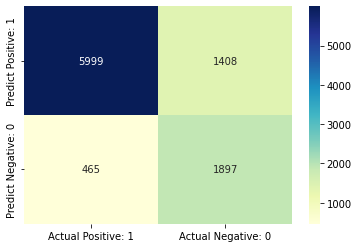

In [62]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame( data = cm, 
                          columns = [ 'Actual Positive: 1', 'Actual Negative: 0' ],
                          index = [ 'Predict Positive: 1', 'Predict Negative: 0' ])

sns.heatmap( cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

plt.show()

# **16. Classification metrices** <a class="anchor" id="16"></a>

[Table of Contents](#0.1)

**Informe de clasificación** es otra forma de evaluar el rendimiento del modelo de clasificación. Muestra las puntuaciones de **precisión (precision)**, **recuperación (recall)**, **f1** y **soporte (support)** para el modelo.

In [63]:
#

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.84      0.81      0.82      9769



In [64]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.8099


In [65]:
#

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9281


In [66]:
#

false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4260


In [67]:
#

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5740


###  f1 Score

**f1-score** es la media armónica ponderada de precisión y recuperación. El mejor **f1-score** posible sería 1.0 y el peor sería 0.0. 

$$f1-Score = \frac{2 \times precision \times recall}{precision + recall}$$


# **17. Calculate class probabilities** <a class="anchor" id="17"></a>

[Table of Contents](#0.1)

In [68]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99999426e-01, 5.74152436e-07],
       [9.99687907e-01, 3.12093456e-04],
       [1.54405602e-01, 8.45594398e-01],
       [1.73624321e-04, 9.99826376e-01],
       [8.20121011e-09, 9.99999992e-01],
       [8.76844580e-01, 1.23155420e-01],
       [9.99999927e-01, 7.32876705e-08],
       [9.99993460e-01, 6.53998797e-06],
       [9.87738143e-01, 1.22618575e-02],
       [9.99999996e-01, 4.01886317e-09]])

In [69]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999994e-01,5.741524e-07
1,9.996879e-01,3.120935e-04
2,1.544056e-01,8.455944e-01
3,1.736243e-04,9.998264e-01
4,8.201210e-09,1.000000e+00
5,8.768446e-01,1.231554e-01
6,9.999999e-01,7.328767e-08
7,9.999935e-01,6.539988e-06
8,9.877381e-01,1.226186e-02
9,1.000000e+00,4.018863e-09


In [70]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

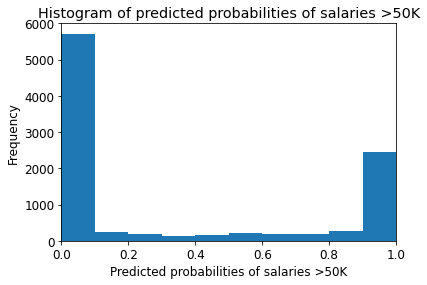

In [71]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')
plt.show()

[Go to Top](#0)